# Import Required Libraries for project



In [15]:
import pandas as pd
import seaborn as sns
import pylab as plot
import numpy as np
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,GradientBoostingClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


# Load the datasets

# Train dataset

In [16]:
#load the train dataset 
#Contains the Survived Variable
data_train=pd.read_csv('train.csv')

In [17]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
#size of the dataset
data_train.shape

(891, 12)

In [19]:
#First 5 rows
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#last 5 rows
data_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [21]:
#all datatypes and null values
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Test Dataset

In [23]:
#load the test dataset 
#Does NOT contain the Survival Variable- to be predicted by higher accuracy model
data_test=pd.read_csv('test.csv')

In [24]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [25]:
#size of the dataset
data_test.shape

(418, 11)

In [26]:
#First 5 rows
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
#last 5 rows
data_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [28]:
#all datatypes and null values
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Exploratory Analysis / Vizualisation of Data

In [126]:
# missing_data function for train dataset 
# plotting percentage graph for missingvalues in each feature

def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    percent_missing = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total_missing, percent_missing], axis=1, keys=['Total_missing', 'Percentage'])
    ms = ms[ms['Percentage']>0]
    f,ax =plt.subplots(figsize=(10,10))
    fig=sns.barplot(ms.index, ms["Percentage"],color="purple",alpha=0.8)
    plt.xlabel('Features', fontsize=20)
    plt.ylabel('Percent', fontsize=20)
    plt.title('Missing data in each feature', fontsize=20)
    return ms

C:\Users\PROHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total_missing,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


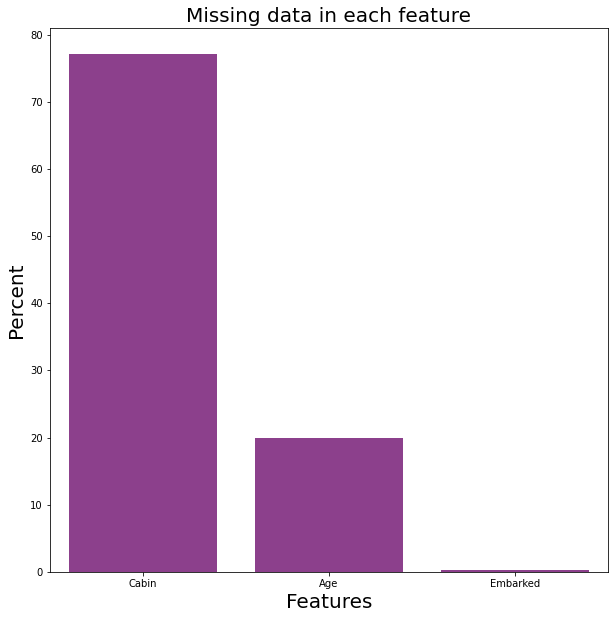

In [127]:
missing_data(data_train)

C:\Users\PROHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total_missing,Percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


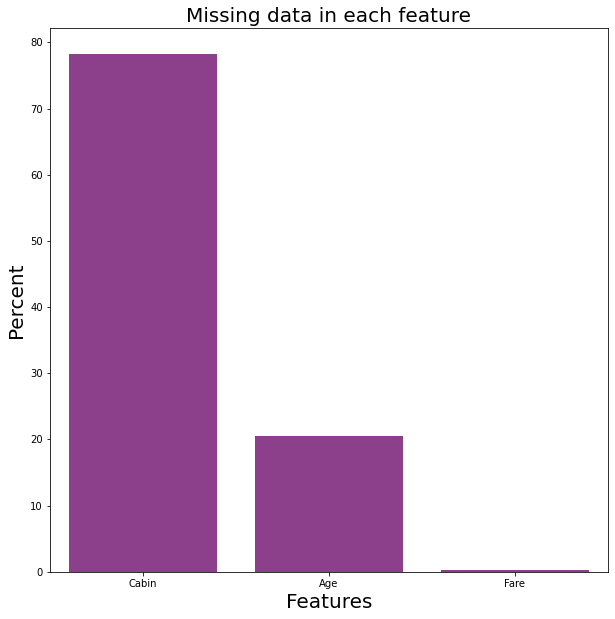

In [128]:
missing_data(data_test)

#### Predicting what values actually contribute to survival

In [33]:
#Adding a 'died' feature for visualization
df_Survival = data_train
df_Survival['Died'] = 1 - df_Survival['Survived'] 


# Survival based on Gender

<AxesSubplot:xlabel='Sex'>

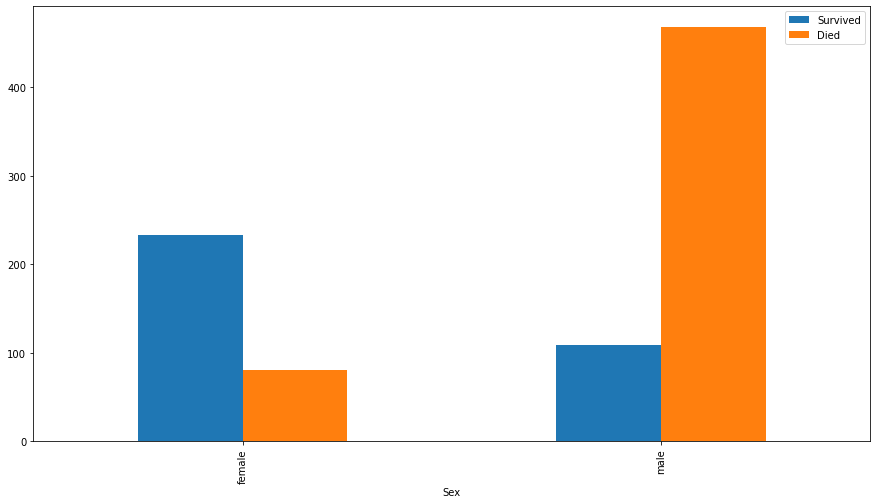

In [34]:
#plot bar graph using groupby function
df_Survival.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar', figsize=(15,8))

# Survival based on Age and Sex


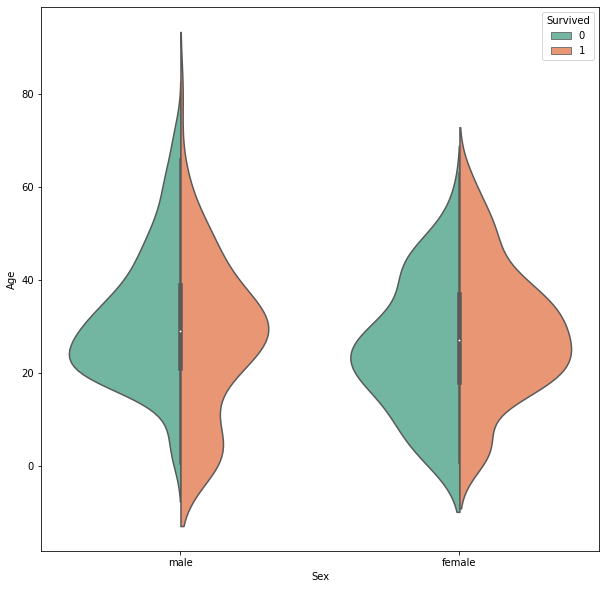

In [35]:
# violin plot for Correlating Survival with Age&Sex
f,ax =plt.subplots(figsize=(10,10))
plot = sns.violinplot(x='Sex', y='Age', hue='Survived',data=df_Survival,palette="Set2",split = True, figsize=(20,1))

# Impact of Fare on Survival


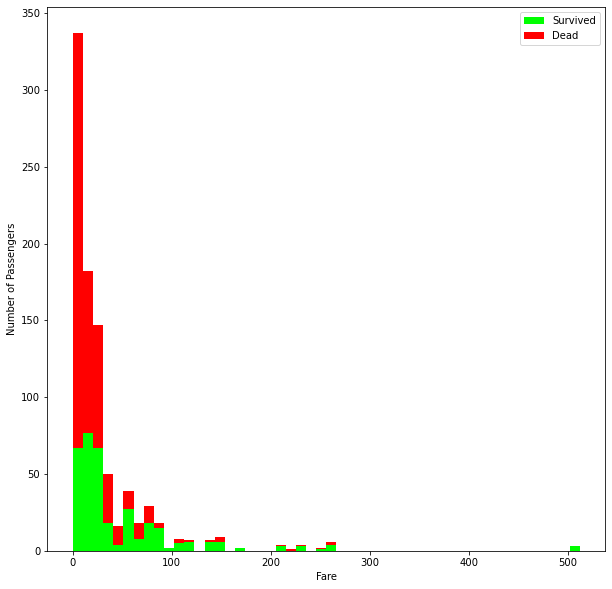

In [36]:
# Using histogram for plotting 
figure = plt.figure(figsize=(10,10))
plt.hist([data_train[data_train['Survived'] == 1]['Fare'], data_train[data_train['Survived'] == 0]['Fare']], stacked=True,bins = 50, label = ['Survived','Dead'], color=("lime","red"))
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend();

#### Above Graph shows that passengers with cheaper fare tickets are likely to die


# Plotting age,fare and survival

Text(0, 0.5, 'Fare')

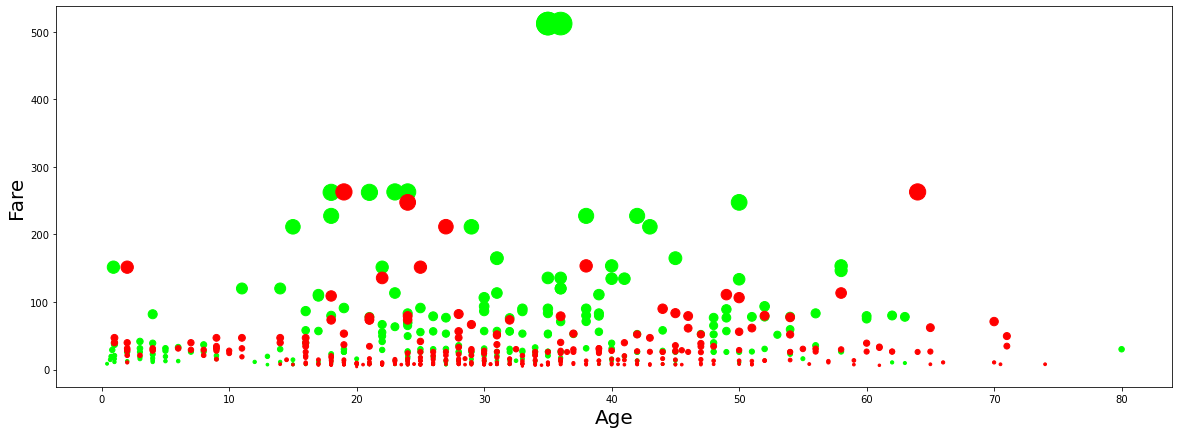

In [37]:
# Using scatter plot
plt.figure(figsize=(20, 7))
ax = plt.subplot()

ax.scatter(data_train[data_train['Survived'] == 1]['Age'], data_train[data_train['Survived'] == 1]['Fare'], c='lime', s=data_train[data_train['Survived'] == 1]['Fare'])
ax.scatter(data_train[data_train['Survived'] == 0]['Age'], data_train[data_train['Survived'] == 0]['Fare'], c='red', s=data_train[data_train['Survived'] == 0]['Fare'])

plt.xlabel('Age',fontsize=20)
plt.ylabel('Fare',fontsize=20)

# Plotting Fare against Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Average fare'>

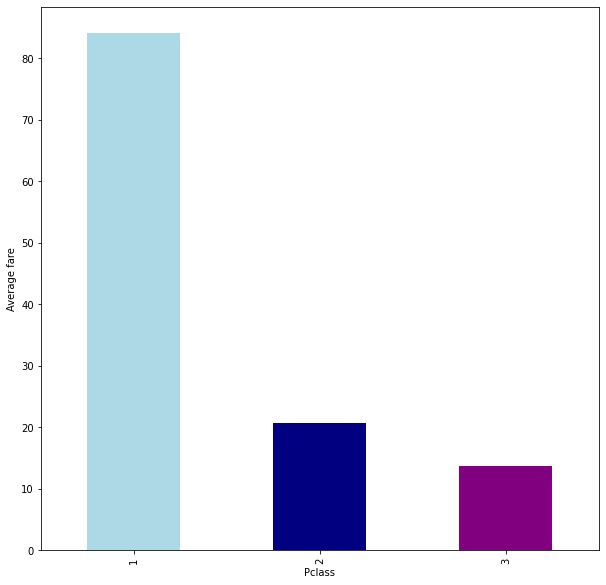

In [38]:
# Using bar chart and groupby function for plotting
plt.figure(figsize=(10,10))
ax = plt.subplot()

ax.set_ylabel('Average fare')
data_train.groupby('Pclass').mean()['Fare'].plot(kind='bar',ax=ax, color=['lightblue', 'navy', 'purple'])

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

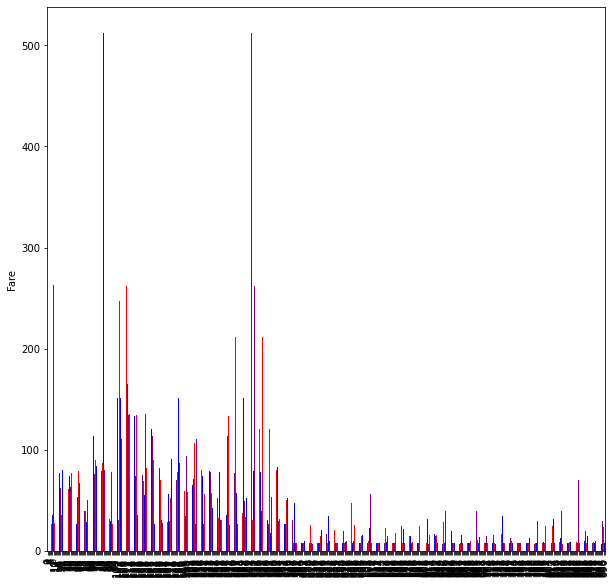

In [39]:
#Another graph for fare vs pclass
plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.set_ylabel('Fare')
data_train.groupby('Pclass')['Fare'].plot(kind='bar',ax=ax,color=['red', 'blue', 'purple'])


# Graph for Sibsp vs PClass

<AxesSubplot:xlabel='Pclass', ylabel='SibSp'>

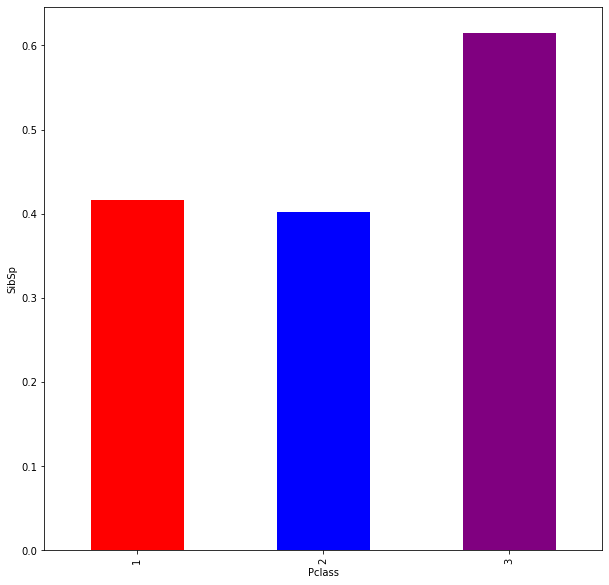

In [40]:
# Sibsp vs Pclass Using bar graph
plt.figure(figsize=(10,10))
ax = plt.subplot()

ax.set_ylabel('SibSp')
data_train.groupby('Pclass').mean()['SibSp'].plot(kind='bar',ax=ax, color=['red', 'blue', 'purple'])

# Correlation between Embarked, Pclass and Sex


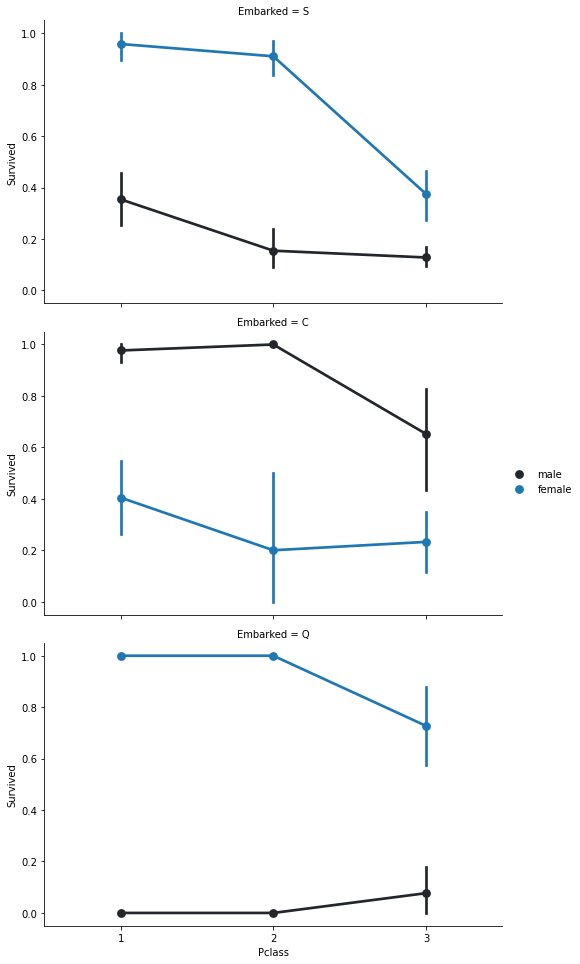

In [41]:
# Plotting using FacetGrid
FacetGrid = sns.FacetGrid(data_train, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

# Plots for Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

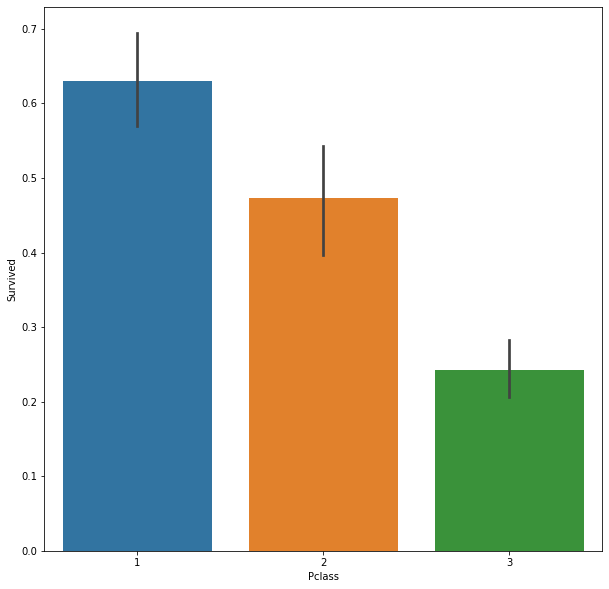

In [42]:
# Graph For Survival Rate based on PClass
plt.figure(figsize=(10,10))
sns.barplot(x='Pclass', y='Survived', data=data_train)

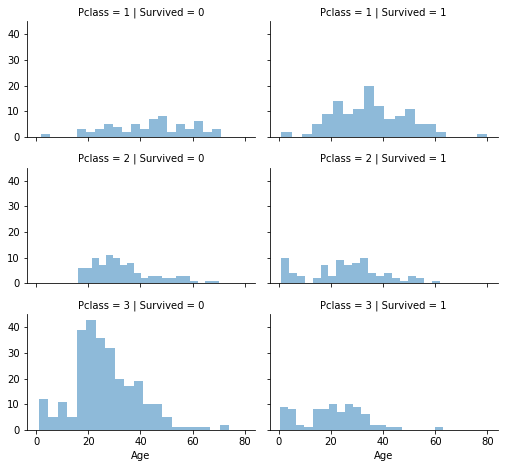

In [43]:
#Second graph for PClass

grid = sns.FacetGrid(data_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [44]:
#Removing Column added for visualization
data_train.drop('Died', axis=1, inplace=True)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# PRE-PROCESSING OF DATA

In [45]:
#combining the test and train data for pre-processing 

df_train = data_train.drop(['Survived'],1)
df_test = data_test
df_train_suv= data_train['Survived']

df_combined = df_train.append(df_test)

In [46]:
#shape of combined dataset
df_combined.shape

(1309, 11)

In [47]:
df_combined

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [48]:
#first 5 rows
df_combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
#last 5 rows
df_combined.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [50]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


# Missing Data in combined dataset

C:\Users\PROHAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total_missing,Percentage
Cabin,1014,77.463713
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394


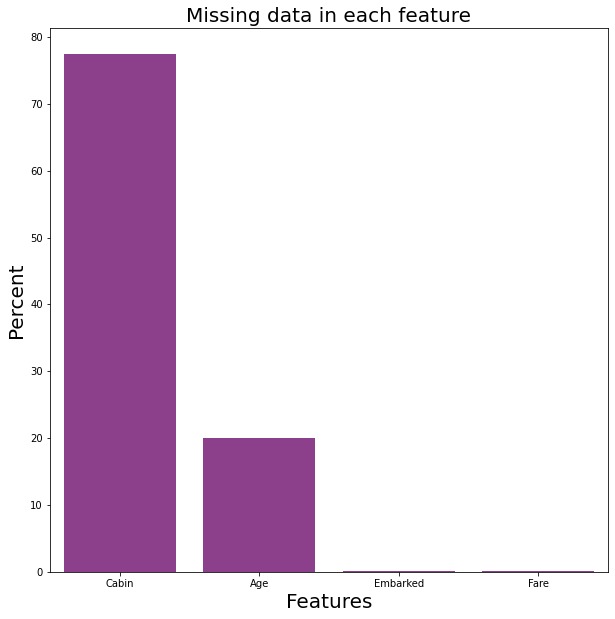

In [51]:
#calling function created above
missing_data(df_combined)

In [52]:
#number of null values in each coloumn
df_combined.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Process Sex 

In [53]:
# converting the Sex column from String to Categorial values 
dict = {'male':2,'female':1}
df_combined= df_combined.replace({'Sex':dict})

In [54]:
#checking the changes
df_combined['Sex']

0      2
1      1
2      1
3      1
4      2
      ..
413    2
414    1
415    2
416    2
417    2
Name: Sex, Length: 1309, dtype: int64

## Creating New Feature Family and Processing it

### (Process Family)

In [55]:
# Calculating family size and creating new features based on the size
def create_familysize():
    global df_combined
    df_combined['Family_size'] = df_combined['Parch'] + df_combined['SibSp'] + 1
    
    df_combined['Single'] = df_combined['Family_size'].map(lambda x: 1 if x == 1 else 0)
    df_combined['SmallFamily'] = df_combined['Family_size'].map(lambda x: 1 if 2 <= x <= 4 else 0)
    df_combined['LargeFamily'] = df_combined['Family_size'].map(lambda x: 1 if 5 <= x else 0)    
    return df_combined

In [56]:
#calling the function
df_combined=create_familysize()

In [57]:
#after adding new features
df_combined

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Single,SmallFamily,LargeFamily
0,1,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,0,1,0
4,5,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",2,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",2,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,1,0,0
416,1308,3,"Ware, Mr. Frederick",2,NaN,0,0,359309,8.0500,NaN,S,1,1,0,0


# Processing Cabin


In [58]:
df_combined['Cabin'].isnull().sum()

1014

In [59]:
#To solve the high number of null values, we substitute all missing cabins with 'U'  (for Uknown)
def process_cabin():
    global df_combined    
   
    df_combined.Cabin.fillna('U', inplace=True)
    
    df_combined['Cabin'] = df_combined['Cabin'].map(lambda x: x[0])
    
    #creating columns for each Cabin Category
    cabin_temp = pd.get_dummies(df_combined['Cabin'], prefix='Cabin')    
    df_combined = pd.concat([df_combined, cabin_temp], axis=1)
    
    #Dropping 'Cabin' column
    df_combined.drop('Cabin', axis=1, inplace=True)

    return df_combined

In [60]:
df_combined=process_cabin()

In [61]:
df_combined

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,LargeFamily,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,S,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,...,0,0,0,1,0,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,...,0,0,0,1,0,0,0,0,0,0
4,5,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,S,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",2,NaN,0,0,A.5. 3236,8.0500,S,...,0,0,0,0,0,0,0,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,...,0,0,0,1,0,0,0,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",2,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,...,0,0,0,0,0,0,0,0,0,1
416,1308,3,"Ware, Mr. Frederick",2,NaN,0,0,359309,8.0500,S,...,0,0,0,0,0,0,0,0,0,1


# Extracting Titles from Name

In [62]:
#Title dictionary for creating ceratin categories
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty",
}

def get_titles():
    # we extract the title from each name and add a Title column
    df_combined['Title'] = df_combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    df_combined['Title'] = df_combined.Title.map(Title_Dictionary)

    return df_combined

In [63]:
df_combined=get_titles()

In [64]:
df_combined

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,S,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,S,...,0,0,0,0,0,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",2,NaN,0,0,A.5. 3236,8.0500,S,...,0,0,0,0,0,0,0,0,1,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,...,0,0,1,0,0,0,0,0,0,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",2,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,...,0,0,0,0,0,0,0,0,1,Mr
416,1308,3,"Ware, Mr. Frederick",2,NaN,0,0,359309,8.0500,S,...,0,0,0,0,0,0,0,0,1,Mr


# Process Age

In [65]:
df_combined['Age'].isnull().sum()

263

In [66]:
# We try to replace null values by creating widespread categories and finding median

#summarize the Age grouped by sex, class and title
df_tempgroup = df_combined.groupby(['Sex','Pclass','Title'])
df_tempgroup_median = df_tempgroup.median()
df_tempgroup_median = df_tempgroup_median.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [67]:
df_tempgroup_median

,Sex,Pclass,Title,Age
0,1,1,Miss,30.0
1,1,1,Mrs,45.0
2,1,1,Officer,49.0
3,1,1,Royalty,40.5
4,1,2,Miss,20.0
5,1,2,Mrs,30.0
6,1,3,Miss,18.0
7,1,3,Mrs,31.0
8,2,1,Master,6.0
9,2,1,Mr,41.5


In [68]:
# From chosen categories, Null value only present in Title and Age
df_combined.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
Family_size      0
Single           0
SmallFamily      0
LargeFamily      0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_T          0
Cabin_U          0
Title            1
dtype: int64

In [69]:
# checking if Title is Null or Not to get Age by categories created
def fill_age(row):
    
    if pd.isnull(row['Title']):
        condition = (
            (df_tempgroup_median['Sex'] == row['Sex']) & 
            (df_tempgroup_median['Pclass'] == row['Pclass'])
        )
    else: condition = (
        (df_tempgroup_median['Sex'] == row['Sex']) & 
        (df_tempgroup_median['Title'] == row['Title']) & 
        (df_tempgroup_median['Pclass'] == row['Pclass'])
    ) 
    
    return df_tempgroup_median[condition]['Age'].values[0]

# a function that fills the missing values of the Age variable
def process_age():
    global df_combined
    df_combined['Age'] = df_combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    
    return df_combined

In [70]:
#call the function
df_combined=process_age()

In [71]:
df_combined

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,S,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,...,0,0,1,0,0,0,0,0,0,Mrs
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,...,0,0,1,0,0,0,0,0,0,Mrs
4,5,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,S,...,0,0,0,0,0,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",2,26.0,0,0,A.5. 3236,8.0500,S,...,0,0,0,0,0,0,0,0,1,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,...,0,0,1,0,0,0,0,0,0,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",2,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,...,0,0,0,0,0,0,0,0,1,Mr
416,1308,3,"Ware, Mr. Frederick",2,26.0,0,0,359309,8.0500,S,...,0,0,0,0,0,0,0,0,1,Mr


In [72]:
#Hence, now no null values in age coloumn
df_combined['Age'].isnull().sum()


0

# Processing Name and Title

In [73]:
# cleaning the Name Parameter

def final_titles():
    global df_combined
   
    df_combined.drop('Name', axis=1, inplace=True)
    
    # creating Title column by category
    titles_temp = pd.get_dummies(df_combined['Title'], prefix='Title')
    df_combined = pd.concat([df_combined, titles_temp], axis=1)
    
    # dropping the Title feature
    df_combined.drop('Title', axis=1, inplace=True)
    
    return df_combined

In [74]:
df_combined=final_titles()

In [75]:
df_combined

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,...,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,2,22.0,1,0,A/5 21171,7.2500,S,2,...,0,0,0,1,0,0,1,0,0,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C,2,...,0,0,0,0,0,0,0,1,0,0
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,...,0,0,0,1,0,1,0,0,0,0
3,4,1,1,35.0,1,0,113803,53.1000,S,2,...,0,0,0,0,0,0,0,1,0,0
4,5,3,2,35.0,0,0,373450,8.0500,S,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,2,26.0,0,0,A.5. 3236,8.0500,S,1,...,0,0,0,1,0,0,1,0,0,0
414,1306,1,1,39.0,0,0,PC 17758,108.9000,C,1,...,0,0,0,0,0,0,0,0,0,0
415,1307,3,2,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1,...,0,0,0,1,0,0,1,0,0,0
416,1308,3,2,26.0,0,0,359309,8.0500,S,1,...,0,0,0,1,0,0,1,0,0,0


# Process Embarked

In [76]:
#Number of Null values in 'Embarked'
df_combined['Embarked'].isnull().sum()

2

In [77]:
df_combined['Embarked'].mode()

0    S
dtype: object

In [78]:
 # two missing embarked values - filling them with the most frequent one in the train  set(S)
def process_embarked():
    global df_combined
    df_combined.Embarked.fillna('S', inplace=True)
    
    # creating catgeory Embarked columns 
    df_embarktemp = pd.get_dummies(df_combined['Embarked'], prefix='Embarked')
    df_combined = pd.concat([df_combined, df_embarktemp], axis=1)
    
    #dropping 'Embarked' column
    df_combined.drop('Embarked', axis=1, inplace=True)

    return df_combined

In [79]:
df_combined = process_embarked()

In [80]:
df_combined

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Family_size,Single,...,Cabin_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,2,22.0,1,0,A/5 21171,7.2500,2,0,...,1,0,0,1,0,0,0,0,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,2,0,...,0,0,0,0,1,0,0,1,0,0
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,1,1,...,1,0,1,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,2,0,...,0,0,0,0,1,0,0,0,0,1
4,5,3,2,35.0,0,0,373450,8.0500,1,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,2,26.0,0,0,A.5. 3236,8.0500,1,1,...,1,0,0,1,0,0,0,0,0,1
414,1306,1,1,39.0,0,0,PC 17758,108.9000,1,1,...,0,0,0,0,0,0,0,1,0,0
415,1307,3,2,38.5,0,0,SOTON/O.Q. 3101262,7.2500,1,1,...,1,0,0,1,0,0,0,0,0,1
416,1308,3,2,26.0,0,0,359309,8.0500,1,1,...,1,0,0,1,0,0,0,0,0,1


# Processing Fare

In [81]:
#only null values present in Fare
df_combined.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Family_size      0
Single           0
SmallFamily      0
LargeFamily      0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_T          0
Cabin_U          0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [82]:
#replacing with median value
m=df_combined['Fare'].median()
df_combined['Fare'].fillna(m, inplace=True)

In [83]:
df_combined['Fare'].isnull().sum()

0

In [84]:
#ALL NULL VALUES REMOVED
df_combined.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Family_size      0
Single           0
SmallFamily      0
LargeFamily      0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_T          0
Cabin_U          0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

# Processing Ticket

In [85]:
df_combined['Ticket'].nunique()

929

In [86]:
#As Ticket has multiple unique values that cannot be converted to categorical values, we drop it
df_combined.drop('Ticket', axis=1, inplace=True)

In [87]:
df_combined.shape

(1309, 29)

#### All Numeric and Non-Null Values in Dataset

In [88]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Pclass         1309 non-null   int64  
 2   Sex            1309 non-null   int64  
 3   Age            1309 non-null   float64
 4   SibSp          1309 non-null   int64  
 5   Parch          1309 non-null   int64  
 6   Fare           1309 non-null   float64
 7   Family_size    1309 non-null   int64  
 8   Single         1309 non-null   int64  
 9   SmallFamily    1309 non-null   int64  
 10  LargeFamily    1309 non-null   int64  
 11  Cabin_A        1309 non-null   uint8  
 12  Cabin_B        1309 non-null   uint8  
 13  Cabin_C        1309 non-null   uint8  
 14  Cabin_D        1309 non-null   uint8  
 15  Cabin_E        1309 non-null   uint8  
 16  Cabin_F        1309 non-null   uint8  
 17  Cabin_G        1309 non-null   uint8  
 18  Cabin_T  

# Correlation Between the Features

# Using a HeatMap for plotting the Correlation

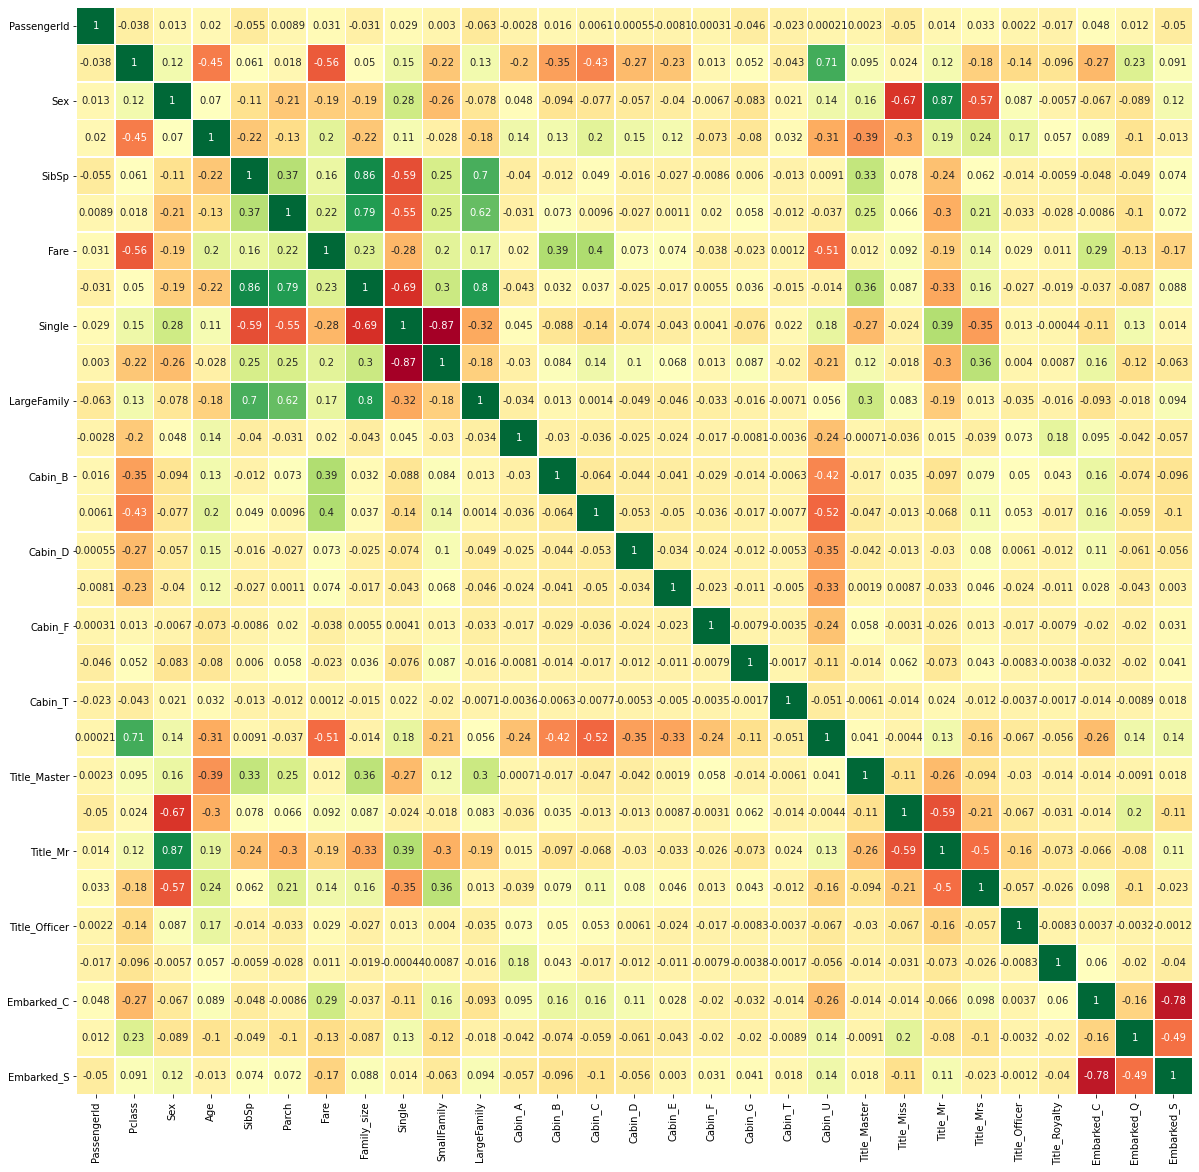

In [131]:
# correlation between Features using heatmap
df_corr = df_combined.corr()
sns.heatmap(df_corr,annot=True,cmap="RdYlGn",linewidth=0.5,cbar=False) 
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

# DATA MODELLING 

### Splitting Combined Data into Train and Test

In [90]:
df_train = df_combined[:891].copy()
df_test = df_combined[891:].copy()
df_train.shape,df_test.shape

((891, 29), (418, 29))

In [91]:
# splitting train dataset into valid dataset
def split_vals(a,n): return a[:n], a[n:]
valid_count =60
n = len(df_train)-valid_count
x_train, x_valid = split_vals(df_train, n)
y_train, y_valid = split_vals(df_train_suv, n)

In [92]:
x_train.shape,x_valid.shape

((831, 29), (60, 29))

In [93]:
y_train.shape, y_valid.shape

((831,), (60,))

# RANDOM FOREST MODEL


In [94]:
# Random Forest model building and training
RFm = RandomForestClassifier(n_estimators=180,min_samples_leaf=3,max_features=0.5,n_jobs=-1)
RFm.fit(x_train,y_train)

#accuracy
RFm.score(x_train,y_train)

0.9133574007220217

# Model Evaluation

In [95]:
y_predict=RFm.predict(x_valid)
from sklearn.metrics import accuracy_score

#accuracy between predicted values and real values on valid dataset
accuracy_score(y_valid,y_predict)

0.8833333333333333

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_valid,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.89      0.77      0.83        22

    accuracy                           0.88        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60



Text(0.5, 1.05, 'Confusion_matrix')

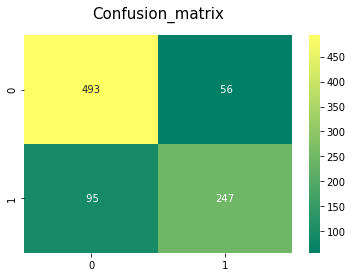

In [97]:
#confusion Matrix

y_predict1 = cross_val_predict(RFm,df_train,df_train_suv,cv=10)
sns.heatmap(confusion_matrix(df_train_suv,y_predict1),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [98]:
#Finding all of the features and their importance in the model
imp_feat = pd.DataFrame({'feature':x_train.columns,'importance':np.round(RFm.feature_importances_,3)})
imp_feat = imp_feat.sort_values('importance',ascending=False).set_index('feature')
print(imp_feat)

               importance
feature                  
Sex                 0.183
Title_Mr            0.178
Fare                0.124
PassengerId         0.117
Age                 0.103
Pclass              0.075
Family_size         0.035
LargeFamily         0.025
Cabin_U             0.025
Title_Miss          0.021
Title_Mrs           0.018
SibSp               0.016
SmallFamily         0.013
Title_Officer       0.011
Embarked_S          0.010
Title_Master        0.007
Embarked_C          0.007
Cabin_E             0.006
Parch               0.006
Single              0.005
Embarked_Q          0.005
Cabin_C             0.004
Cabin_D             0.003
Cabin_B             0.002
Cabin_A             0.001
Cabin_F             0.000
Cabin_G             0.000
Cabin_T             0.000
Title_Royalty       0.000


<AxesSubplot:xlabel='feature'>

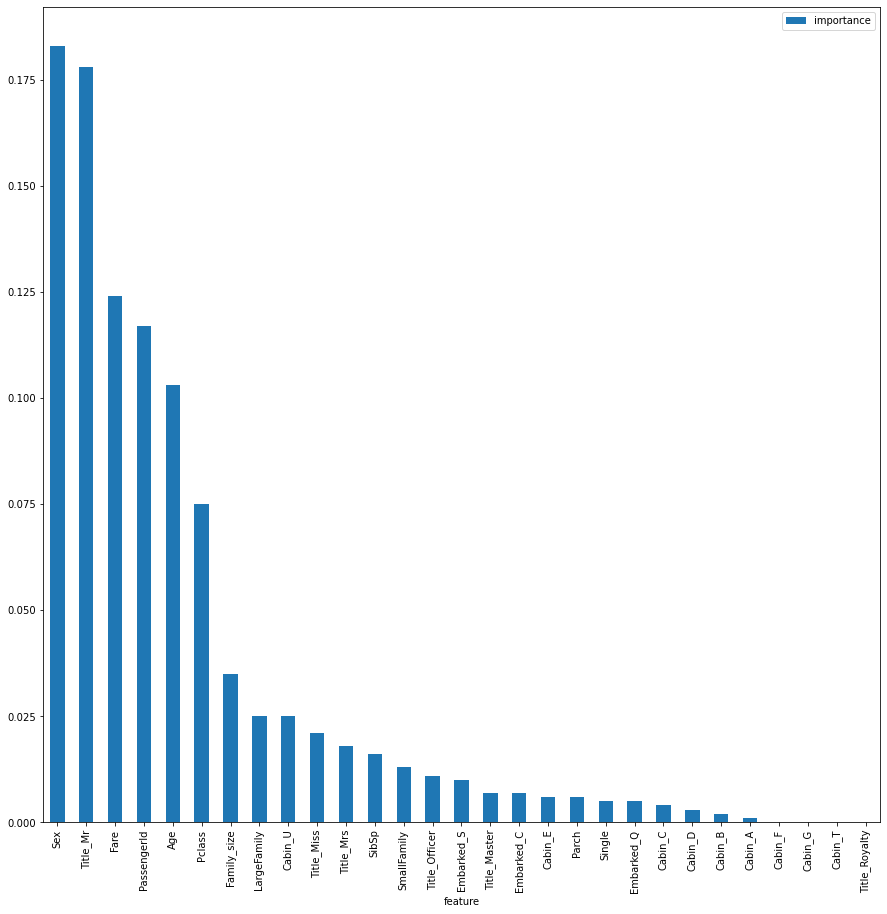

In [99]:
imp_feat.plot.bar(figsize=(15,15))

In [100]:
# Keeping only the variables which are significant for the model(>0.01)
feat_filter=imp_feat[imp_feat['importance']>0.01].index
print(feat_filter)


Index(['Sex', 'Title_Mr', 'Fare', 'PassengerId', 'Age', 'Pclass',
       'Family_size', 'LargeFamily', 'Cabin_U', 'Title_Miss', 'Title_Mrs',
       'SibSp', 'SmallFamily', 'Title_Officer'],
      dtype='object', name='feature')


# FINAL RF MODEL


In [101]:
#Now training the model on the entire data with only the important features.
df_train_rf = df_train[feat_filter]

In [102]:
df_train_rf.shape

(891, 14)

In [103]:
#new rf model after keeping only imp features
m = RandomForestClassifier(n_estimators=200,min_samples_leaf=3,max_features=0.5,n_jobs=-1)
m.fit(df_train_rf,df_train_suv)
m.score(df_train_rf,df_train_suv)

0.9180695847362514

In [104]:
#increased accuracy for valid dataset
x_valid1= x_valid[feat_filter]
y_predict2=m.predict(x_valid1)


#accuracy between predicted values and real values on valid dataset
accuracy_RF=accuracy_score(y_valid,y_predict2)
print(f"The accuracy of the Random Forest is {accuracy_RF}")

The accuracy of the Random Forest is 0.9833333333333333


# Logistic Regression Model

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
#Building and training model 
LRmodel = LogisticRegression(solver='lbfgs', max_iter=10000)

In [107]:
LRmodel.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

# Model Evaluation for LR


In [108]:
prediction_lr=LRmodel.predict(x_valid)
from sklearn.metrics import accuracy_score
accuracy_LR = accuracy_score(prediction_lr,y_valid)
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_valid)*100,2))

The accuracy of the Logistic Regression is 85.0


Text(0.5, 1.05, 'Confusion_matrix')

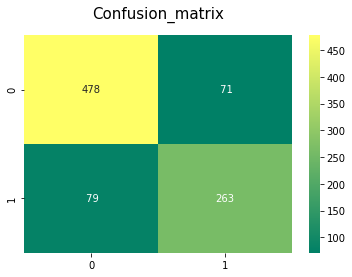

In [109]:
#confusion matrix

y_predict = cross_val_predict(LRmodel,df_train,df_train_suv,cv=10)

sns.heatmap(confusion_matrix(df_train_suv,y_predict),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

# MODEL COMPARISONS

In [110]:
# Random Forest score

from sklearn.model_selection import cross_val_score 
result_RF=cross_val_score(m,df_train,df_train_suv,cv=10,scoring='accuracy')

In [111]:
# Logisitic Regression Score

from sklearn.model_selection import cross_val_score 
result_LR=cross_val_score(LRmodel,df_train,df_train_suv,cv=10,scoring='accuracy')

In [112]:
# Model Comparsion

models = pd.DataFrame({
    'Model': ['Logistic Regression',  'Random Forest'],
    'Score': [result_LR.mean(), result_RF.mean()],
    'Accuracy':[accuracy_LR,accuracy_RF]})
models.sort_values(by='Accuracy',ascending=False)

,Model,Score,Accuracy
1,Random Forest,0.835069,0.983333
0,Logistic Regression,0.831673,0.850000


# OUTPUT

#### As Random Forest Model gives better accuracy, we present its output prediction on test dataset

In [113]:
#Taking only selected features of Test Dataset
df_test= df_test[feat_filter]
y_final_predict=m.predict(df_test)

In [114]:
dict1 = {0:'Died',1:'Survived'}

pd.DataFrame(y_final_predict, columns=['Prediction']).replace({'Prediction':dict1})

,Prediction
0,Died
1,Died
2,Died
3,Died
4,Survived
...,...
413,Died
414,Survived
415,Died
416,Died
